*Neste projeto de análise de uma base de crédito, foram aplicadas técnicas de limpeza e tratamento de dados para obter informações relevantes sobre o comportamento dos clientes e o risco de inadimplência. Através dessa análise, foram identificados padrões e tendências que forneceram insights valiosos para a empresa.*

*Inicialmente, foram examinadas as informações relacionadas à base salarial dos clientes. Embora tenha sido observado um maior número de clientes inadimplentes entre aqueles com mestrado, ensino médio e sem educação formal, esses números eram baixos demais para traçar um perfil de comportamento com base na escolaridade.*

*Em seguida, foi investigada a relação entre as transações dos clientes ao longo de 12 meses e a inadimplência. Observou-se um padrão onde os clientes com poucas transações tendiam a ter um comportamento de inadimplência, indicando a importância de acompanhar a atividade de transações para identificar possíveis clientes em risco.*

*Além disso, a análise revelou que os clientes que operavam com valores de transações entre* **RS1000,00** *e* **RS4000,00** *apresentavam uma tendência a não pagar suas faturas, o que indicava um possível fator de risco para inadimplência.*

*Com base nessas informações, a empresa pode traçar estratégias mais direcionadas para gerenciar o risco de inadimplência. Isso pode incluir a oferta de produtos específicos para diferentes perfis de clientes, a implementação de medidas preventivas e a otimização da concessão de crédito com base nos padrões identificados.*

*Em resumo, essa análise da base de crédito proporcionou insights valiosos para a empresa, permitindo uma abordagem mais precisa e estratégica na gestão de risco de inadimplência, reduzindo potenciais perdas e melhorando a tomada de decisões relacionadas ao crédito oferecido aos clientes.*

**Importar as bibliotecas.**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px;

In [2]:
#importar a base de dados para manipulação.

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [3]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# **Criando a Estrutura para analise.**

In [4]:
df.shape

(10127, 16)

In [5]:
quant_total, _=df.shape
quant_adimplementes, _ = df[df['default']== 0].shape
quant_inadimplentes, _ = df[df['default']== 1].shape

In [6]:
print(f"A proporção clientes adimplentes é de {round(100 * quant_adimplementes / quant_total, 2)}%")
print(f"A proporção clientes inadimplentes é de {round(100 * quant_inadimplentes / quant_total, 2)}%")

A proporção clientes adimplentes é de 83.93%
A proporção clientes inadimplentes é de 16.07%


# **Schema**

**Filtrando as coluna e tipos de dados.**

In [7]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

**Verificando todos os dados 'Object' em busca de falhas. Importante também observar a tabela e verificar seus dados.**

In [8]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


**Foram encontrados dois erros de tipos.** *'limite_credito, valor_transacoes_12m'.* **Próximos passos são verificar dados faltantes e fazer tratamento desses erros.**

In [9]:
df.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of           id  default  idade   sexo  dependentes  escolaridade  estado_civil  \
0      False    False  False  False        False         False         False   
1      False    False  False  False        False         False         False   
2      False    False  False  False        False         False         False   
3      False    False  False  False        False         False          True   
4      False    False  False  False        False         False         False   
...      ...      ...    ...    ...          ...           ...           ...   
10122  False    False  False  False        False         False         False   
10123  False    False  False  False        False          True         False   
10124  False    False  False  False        False         False         False   
10125  False    False  False  False        False         False          True   
10126  False    False  False  False        False         F

**Verificar informações estatísticas com relação aos dados faltantes na base de dados.**

In [10]:
def dados_faltantes(df: pd.DataFrame) -> None:
    
    dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            quant, _=df[df[col].isna()].shape
            total, _=df.shape
            dict_dados_faltantes = {col: {'quantidade': quant, 'porcentagem': round(100 * quant / total, 2)}}
            dados_faltantes.append(dict_dados_faltantes)
    for stats in dados_faltantes:
        print(stats)

In [11]:
dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [12]:
dados_faltantes(df = df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [13]:
dados_faltantes(df = df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# **Modificando e fazendo limpeza dos dados**

**Nessa etapa fiz a correção dos erros nas colunas** *Limite de Credito* **e** *Valor_transacoes_12m.*


In [14]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Com uma função **lambda** irei fazer limpeza dos dados e a conversão de object para float.

In [16]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [17]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

**Finalizado a correção das colunas** *limite_credito* **e** *valor_transacoes_12m*.

**Agora fazer a remoção dos dados Nulos.**

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(7081, 16)

In [20]:
df[df['default'] == 0].shape

(5968, 16)

In [21]:
df[df['default'] == 1].shape

(1113, 16)

*Após o tratamento dos dados, incluindo a correção das colunas e a remoção dos valores nulos, o número total de informações contidas na nossa base de dados foi atualizado.*

*Antes do tratamento, tínhamos um total de* **10.127** *linhas.*
*Após o tratamento, esse número foi reduzido para* **7.081** *linhas.*

# **Agora iniciar a visualização dessas informações.**

In [22]:
sns.set_style('whitegrid')

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

**Nesta primeira análise, iremos comparar a base salarial dos clientes para obter mais informações.**

In [23]:
#Estou puxando todos os object da base de dados para verificação.
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


**Análise da Escolaridade**

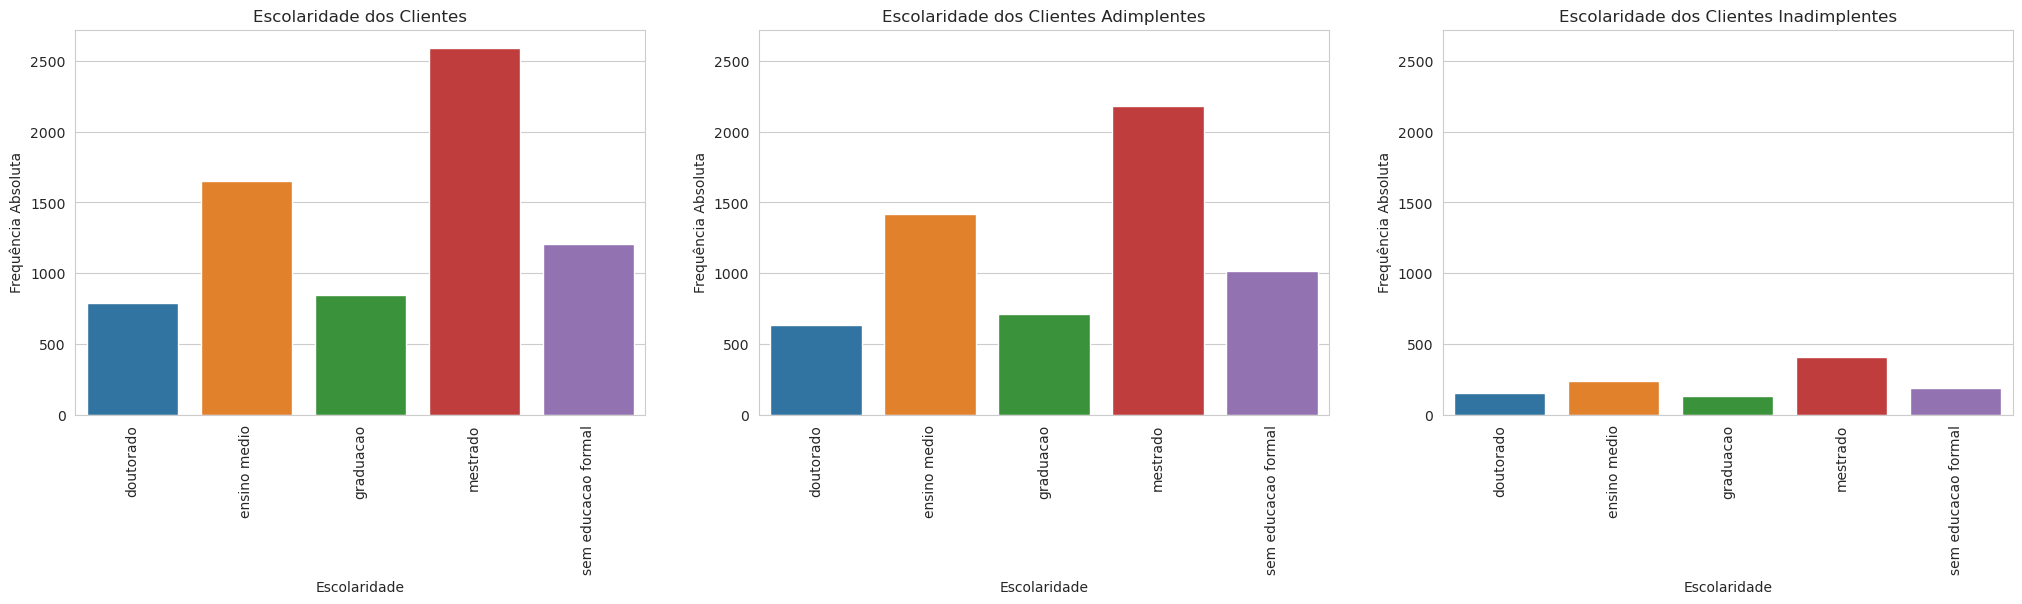

In [55]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns = {coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])
    
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1



*Podemos observar, com base na análise acima, que entre as cinco categorias de escolaridade, aqueles com mestrado têm o maior número de clientes na faixa de inadimplência, seguidos pelos clientes com ensino médio e sem educação formal. No entanto, é importante destacar que os números são extremamente baixos e, com base nessas informações, não é possível traçar um perfil de comportamento com base na escolaridade dos clientes.*

**Análise Salarial.**

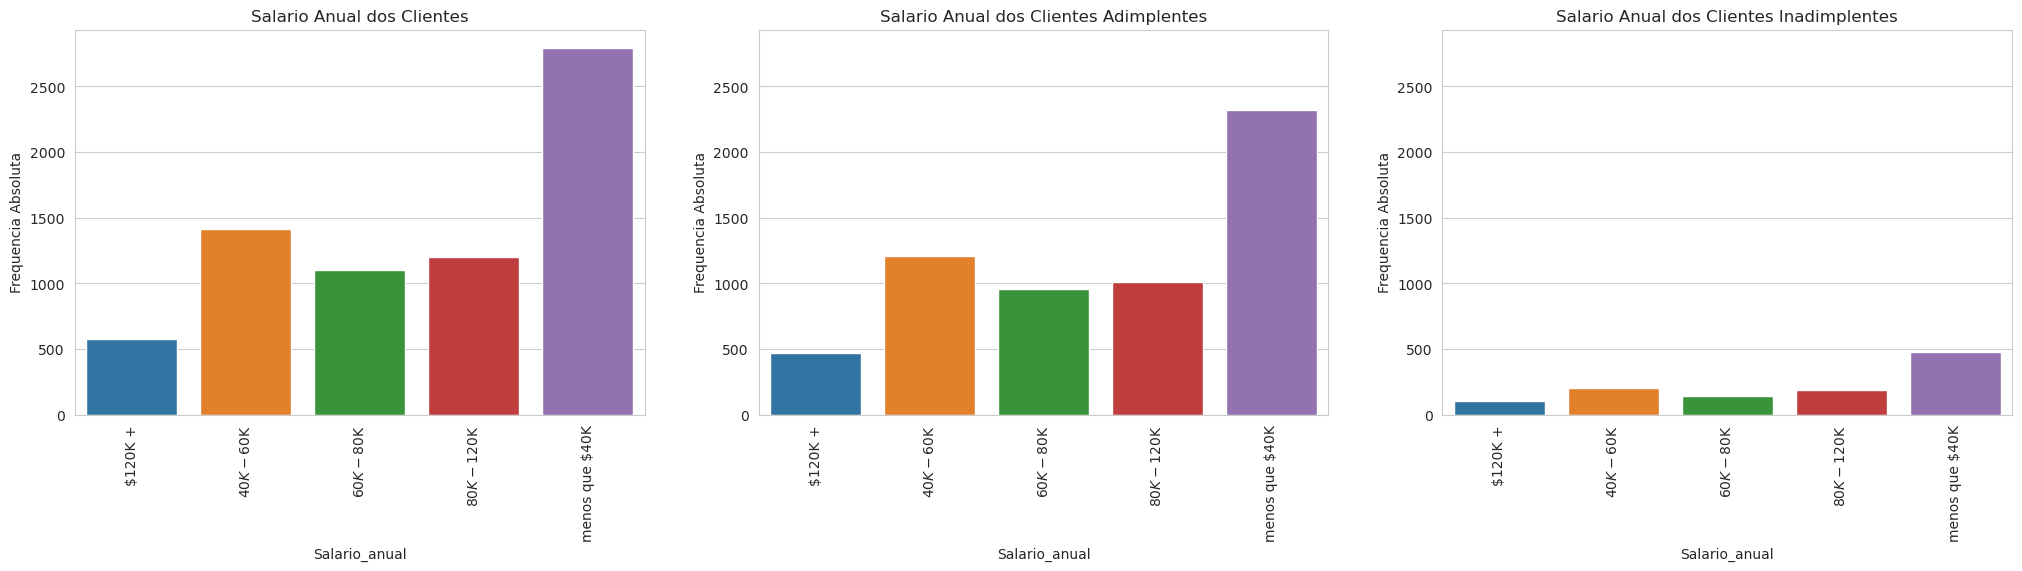

In [24]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario Anual dos Clientes Adimplentes', 'Salario Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize = (25, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns = {coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.reset_index(inplace=True, drop=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)
    
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

*Observando o gráfico, é possível constatar que os clientes com uma base salarial de* **RS40.000,00** *apresentam uma tendência maior de entrar na categoria de clientes inadimplentes.*

**Visualizações Numéricas**

In [25]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


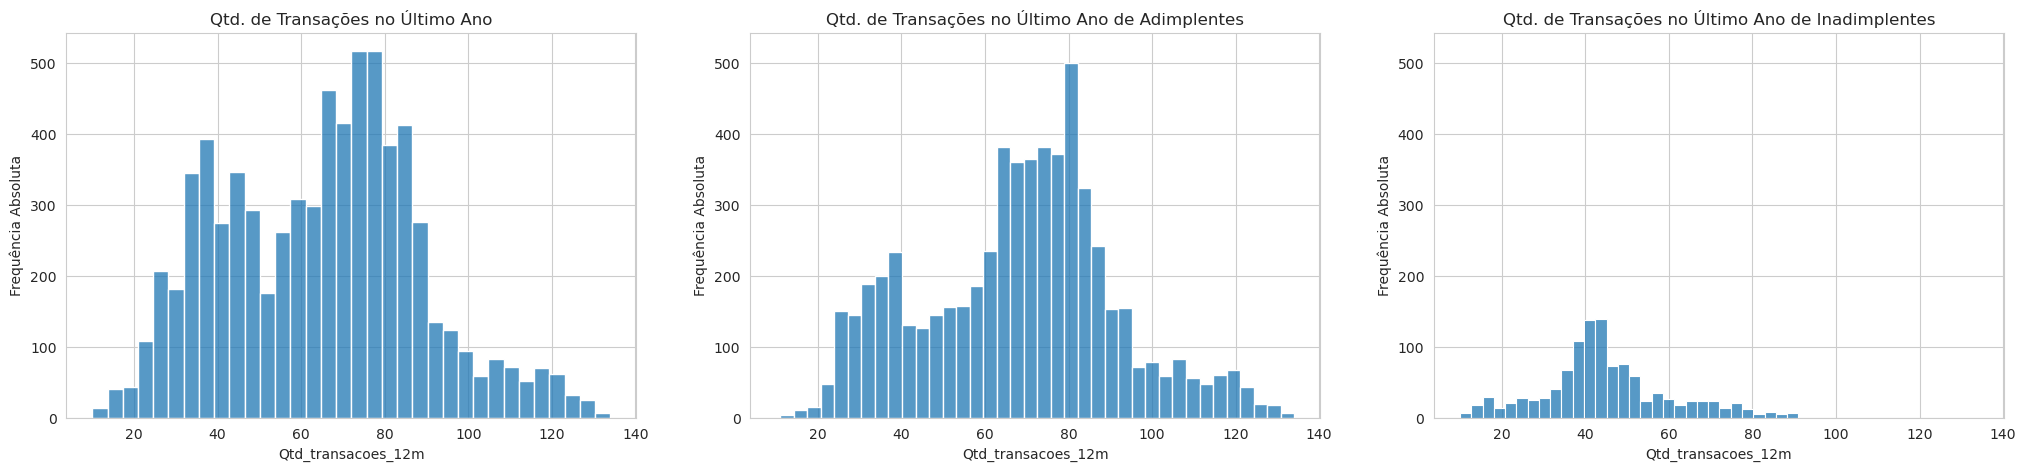

In [26]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

*No gráfico acima, podemos observar um padrão em que os clientes que realizam poucas transações ao longo de* **12 meses** *tendem a apresentar um comportamento de entrar na categoria de clientes negativados.*

**Valores das Transações Anual**

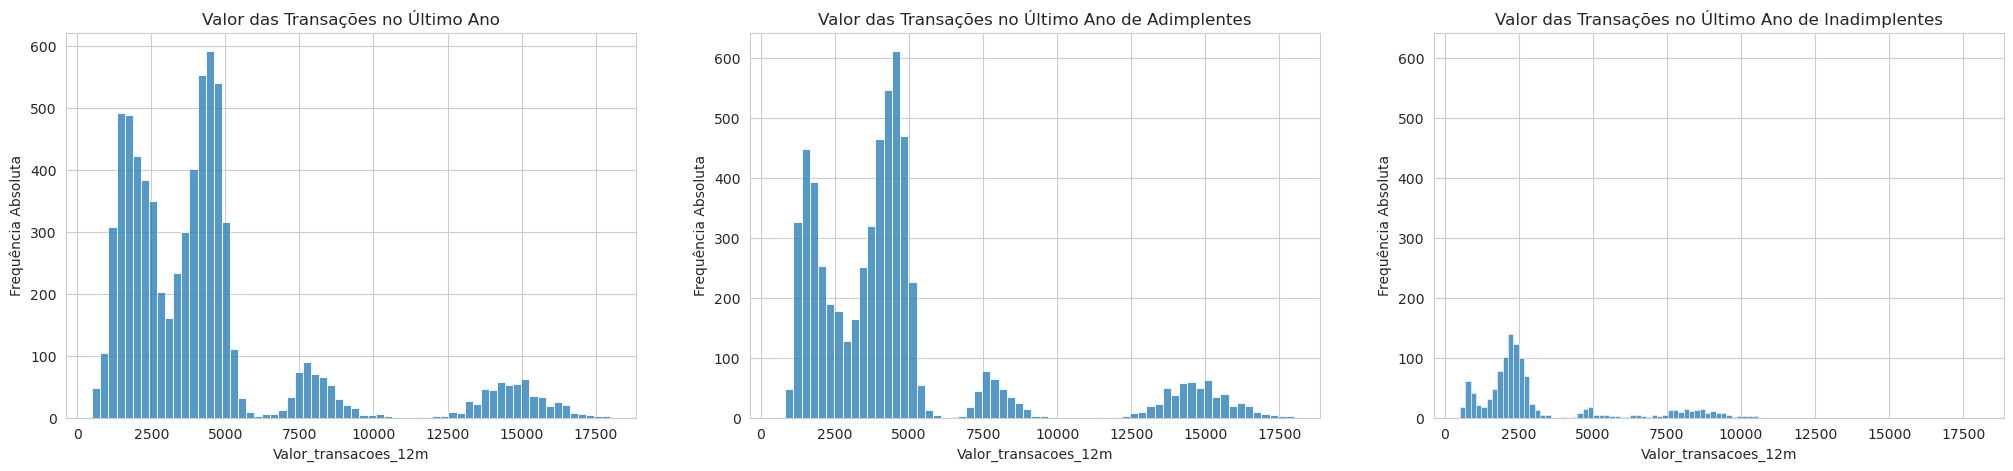

In [27]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(25, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

*Com base na análise dos gráficos acima, podemos verificar que os clientes que realizam transações com valores entre* **RS1000,00** *e* **RS4000,00** *apresentam uma tendência a não pagar suas faturas, resultando em sua entrada na categoria de clientes negativados.*

**Relação entre Valores de Transações do último Ano e a Quantidade de Transações feita.**

In [43]:
fig  = px.scatter(df, x = 'qtd_transacoes_12m', y ='valor_transacoes_12m', color = 'default', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 10, line=dict(width = 2)), selector = dict(mode = 'default'))
fig.update_layout(title = 'Relação entre Valor e Quantidade de Transações no Último Ano.')
fig.update_xaxes(title = 'Quantidade das Transações no Último Ano.')
fig.update_yaxes(title = 'Valor das Transações no Último Ano.')
fig.show()

*Com a análise dos gráficos anteriores e do gráfico atual, é possível observar que existe uma concentração significativa de clientes inadimplentes na faixa de gastos entre* **RS1000,00** *e* **RS4000,00.** *Isso indica uma tendência de que os clientes que operam nessa faixa de valores possuem um risco maior de não pagar suas faturas e entrar na categoria de inadimplentes. No entanto, é importante ressaltar que essa é uma tendência observada nos dados analisados e pode variar em diferentes contextos ou com a inclusão de outros fatores relevantes na análise.*


*Depois de analisar todas as informações extraídas da base de dados e examinar os gráficos, podemos utilizar essas informações para traçar um perfil de possíveis clientes que têm maior probabilidade de entrar na categoria de devedores. Com base nos padrões identificados, é possível criar produtos específicos para cada cliente, personalizando as ofertas de crédito de acordo com suas características. Essa abordagem visa reduzir as perdas da empresa, evitando a liberação de crédito para perfis de clientes com maior risco de inadimplência. Ao segmentar os clientes e desenvolver estratégias mais direcionadas, a empresa pode tomar medidas proativas para mitigar riscos e otimizar seus resultados financeiros.*